# TIC Data Analysis

#### Import libraries

In [559]:
import pandas as pd
import matplotlib.pyplot as plt

#### Read data from .csv

In [560]:

df = pd.read_csv("dataNew.csv", sep=";")

df = df.rename(columns={'Дата': 'Date', 'Пол': 'Sex', 'Возраст': 'Age', 'Город': 'City',
                        'Цель визита': 'Purpose_of_visit', 'Покупки': 'Purchases', 'Вопросы': 'Questions',
                        'Полиграфия': 'Polygraphy', 'Электронная карта': 'Online_map', 'Комментарии': 'Comments'})


In [561]:
df.head()

,Date,Sex,Age,City,Purpose_of_visit,Purchases,Questions,Полиграфия,Online_map,Comments
0,01.03.2024,Мужчина,12 - 17 лет,пдлвп,Печатные карты,пылдплд,пылоипоыл,Да,Нет,пыпы
1,01.03.2024,Ребенок,36 - 50 лет,NaN,Сувениры,NaN,пыпы,Да,Да,пыры
2,02.03.2024,Пол,Возраст,Город,Цель визита,Покупки,Вопросы,Полиграфия,Электронная карта,Комментарии
3,02.03.2024,Мужчина,26 - 35 лет,Тверь,Просто посмотреть,NaN,NaN,NaN,NaN,NaN
4,03.03.2024,Пол,Возраст,Город,Цель визита,Покупки,Вопросы,Полиграфия,Электронная карта,Комментарии


In [562]:
df.tail()

,Date,Sex,Age,City,Purpose_of_visit,Purchases,Questions,Полиграфия,Online_map,Comments
1817,31.03.2024,Женщина,18 - 25 лет,NaN,Сувениры,NaN,NaN,Нет,Нет,NaN
1818,31.03.2024,Женщина,18 - 25 лет,NaN,Сувениры,NaN,NaN,Нет,Нет,NaN
1819,31.03.2024,Женщина,18 - 25 лет,NaN,Просто посмотреть,NaN,NaN,Да,Да,NaN
1820,31.03.2024,Женщина,18 - 25 лет,NaN,Просто посмотреть,NaN,NaN,Да,Нет,NaN
1821,31.03.2024,Ребенок,18 - 25 лет,NaN,Просто посмотреть,NaN,NaN,Нет,Да,NaN


#### Cleaning data

I realised that there are unnecessary rows. So I had to check for them

In [563]:
unnecessaryRows = df.query('Date != "01.03.2024" and Sex == "Пол"')
unnecessaryRows.shape[0]

30

In [564]:
unnecessaryRows.head()

,Date,Sex,Age,City,Purpose_of_visit,Purchases,Questions,Полиграфия,Online_map,Comments
2,02.03.2024,Пол,Возраст,Город,Цель визита,Покупки,Вопросы,Полиграфия,Электронная карта,Комментарии
4,03.03.2024,Пол,Возраст,Город,Цель визита,Покупки,Вопросы,Полиграфия,Электронная карта,Комментарии
186,04.03.2024,Пол,Возраст,Город,Цель визита,Покупки,Вопросы,Полиграфия,Электронная карта,Комментарии
188,05.03.2024,Пол,Возраст,Город,Цель визита,Покупки,Вопросы,Полиграфия,Электронная карта,Комментарии
208,06.03.2024,Пол,Возраст,Город,Цель визита,Покупки,Вопросы,Полиграфия,Электронная карта,Комментарии


Let's get rid of them. And also one bad city

In [565]:
df = df.drop(df.query('Date != "01.03.2024" and Sex == "Пол"').index)
df = df.drop(df[df.City == "пдлвп"].index)

Now I want to add column for weekdays. \
In process, I realised that I need to change the date format for my own comfort. I managed those things like this

In [566]:
df.Date = df.Date.str.split(".").str[::-1].str.join("-")

weekday = pd.to_datetime(df.Date).dt.day_name()
df.insert(1, 'Weekday', weekday)
df.head()

,Date,Weekday,Sex,Age,City,Purpose_of_visit,Purchases,Questions,Полиграфия,Online_map,Comments
1,2024-03-01,Friday,Ребенок,36 - 50 лет,NaN,Сувениры,NaN,пыпы,Да,Да,пыры
3,2024-03-02,Saturday,Мужчина,26 - 35 лет,Тверь,Просто посмотреть,NaN,NaN,NaN,NaN,NaN
5,2024-03-03,Sunday,Женщина,36 - 50 лет,МО,Экскурсии,NaN,"экскурсии групповые, когда можно будет покатат...",Да,Нет,NaN
6,2024-03-03,Sunday,Женщина,старше 50,Тверь,Просто посмотреть,NaN,кто сделал монпансье,Да,Нет,с ребенком
7,2024-03-03,Sunday,Женщина,36 - 50 лет,Тверь,Просто посмотреть,NaN,NaN,Да,Нет,с ребенком


Most of our cities and some of our genders are written in lowercase. Also let's fix our purshases column!

In [567]:
df.City = df.City.str.lstrip().str.rstrip().str.title()
df.Sex = df.Sex.str.lstrip().str.rstrip().str.title()
df.Purchases = df.Purchases.fillna('Nothing')
df.Purchases = df.Purchases.str.lstrip().str.rstrip().str.capitalize()

At this step I found out that there was "Санкт-Петербург" and "Питер" in dataframe, which is basically the same city.


In [568]:
df = df.replace(["Питер", "Спб"], "Санкт-Петербург")

#### Data analysis

Now we can start getting basic info, like "How many man\woman visited our center in month of March"

In [569]:
totalSex = df.Sex.value_counts()
totalSex

Sex
Женщина      756
Мужчина      456
Ребенок      375
Подросток    204
Name: count, dtype: int64

Let's look at our visitors based on their sex and city they are from

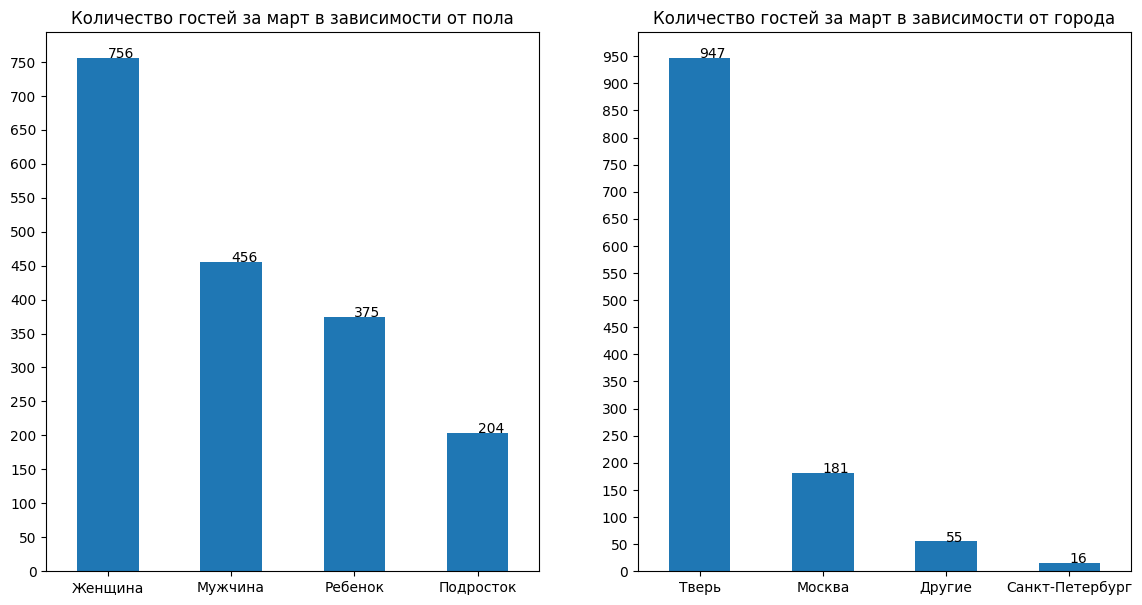

In [570]:
totalCities = df.City.value_counts()
totalCities['Другие'] = totalCities.sum() - sum(totalCities[:3])
totalCities = totalCities.filter(['Тверь', 'Москва', 'Санкт-Петербург', 'Другие']).sort_values(ascending=False)


plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title('Количество гостей за март в зависимости от пола')
totalSex.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("")
plt.yticks(range(max(totalSex) - 6, -1, -50))
sex = totalSex.axes[0].to_list()
for i in range(len(sex)):
    plt.annotate(totalSex.iloc[i], (i, totalSex.iloc[i]))


plt.subplot(1, 2, 2)
plt.title('Количество гостей за март в зависимости от города')
totalCities.plot(kind='bar')
plt.xticks(rotation=0)
plt.yticks(range(max(totalCities) + 3, -1, -50))
cities = totalCities.axes[0].to_list()
for i in range(len(cities)):
    plt.annotate(totalCities.iloc[i], (i, totalCities.iloc[i]))

plt.show()

Let's look at how many people visited us every day. Firstly, grouping our dataframe by 'Dates' column

In [571]:
groupByDate = df.groupby('Date').agg({'Date': 'count'})
groupByDate.rename(columns={'Date': 'Total_visitors'}, inplace=True)
groupByDate.head()

,Total_visitors
Date,
2024-03-01,1
2024-03-02,1
2024-03-03,181
2024-03-04,1
2024-03-05,19


Creating arrays for total visitors every day and dates. Plotting those arrays

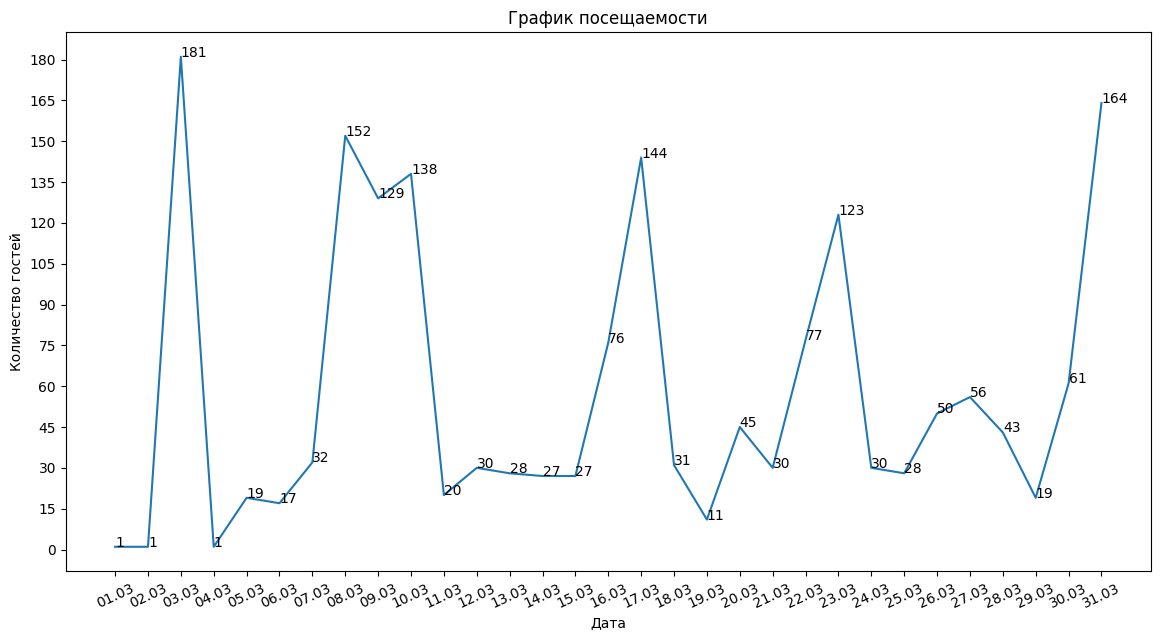

In [572]:
totalVisitors = groupByDate.Total_visitors

dates = []
for x in range(1, 31 + 1):
    if x < 10:
        dates.append(f'0{x}.03')
    else:
        dates.append(f'{x}.03')


plt.figure(figsize=(14, 7))
plt.plot(dates, totalVisitors)
plt.title('График посещаемости')
plt.xlabel('Дата')
plt.ylabel('Количество гостей')
plt.xticks(rotation=25)
plt.yticks(range(max(totalVisitors) - 1, -1, -15))
for i in range(len(dates)):
    plt.annotate(totalVisitors.iloc[i], (i, totalVisitors.iloc[i]))

plt.show()

Now our task is to count visitors who asked for a paper map and determine where they were from and how old they were

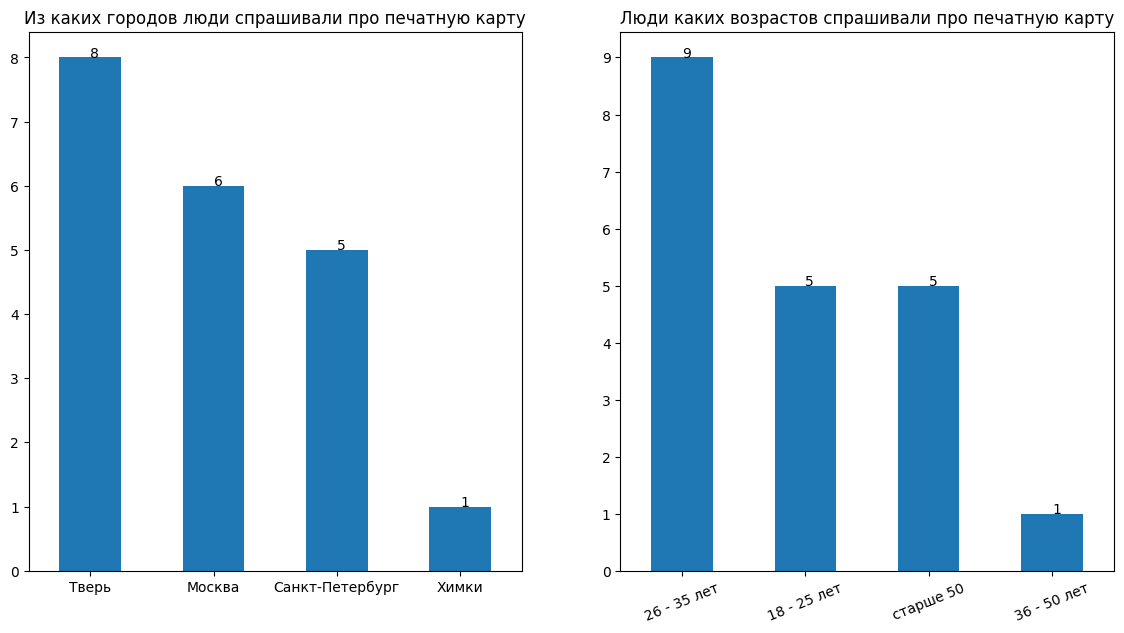

In [573]:
askedForMap = df.query('Purpose_of_visit == "Печатные карты"')[['City', 'Age', 'Purpose_of_visit']]


askedForMapCities = askedForMap.City.value_counts().sort_values(ascending=False)
askedForMapAges = askedForMap.Age.value_counts()


plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title('Из каких городов люди спрашивали про печатную карту')
askedForMapCities.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("")
plt.yticks(range(max(askedForMapCities), -1, -1))
cities = askedForMapCities.axes[0].to_list()
for i in range(len(cities)):
    plt.annotate(askedForMapCities.iloc[i], (i, askedForMapCities.iloc[i]))


plt.subplot(1, 2, 2)
plt.title('Люди каких возрастов спрашивали про печатную карту')
askedForMapAges.plot(kind='bar')
plt.xticks(rotation=22)
plt.xlabel("")
plt.yticks(range(max(askedForMapAges), -1, -1))
ages = askedForMapAges.axes[0].to_list()
for i in range(len(ages)):
    plt.annotate(askedForMapAges.iloc[i], (i, askedForMapAges.iloc[i]))

plt.show()

Now let's see who asked for a walking route. Same thing, age and city

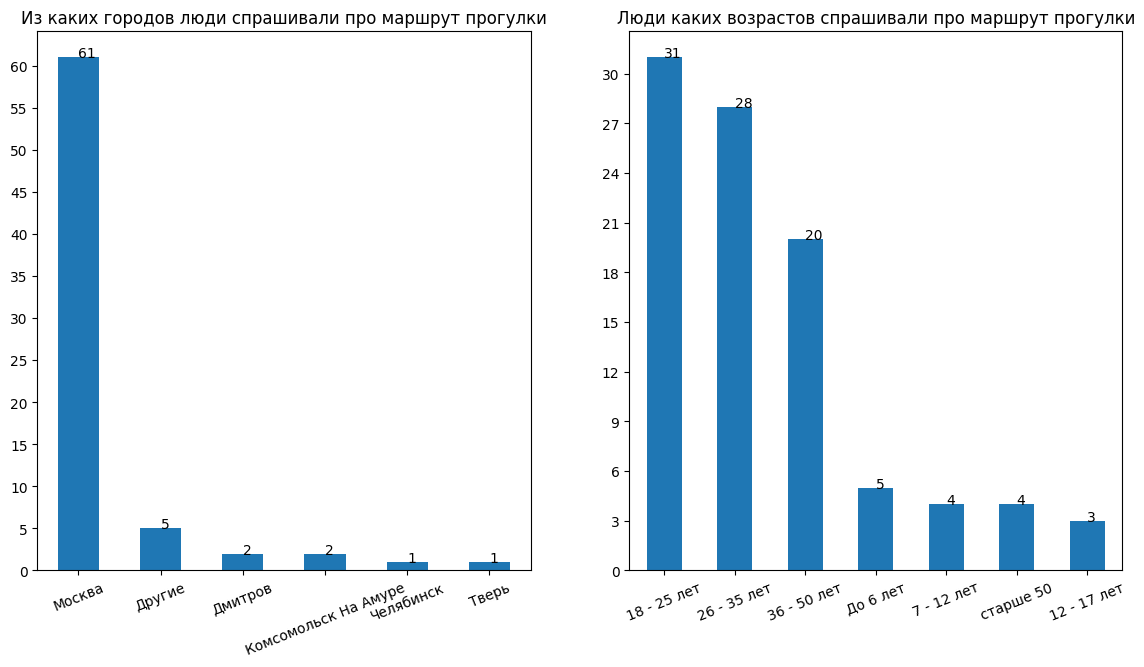

In [574]:
askedForRoute = df.query('Purpose_of_visit == "Маршрут прогулки"')[['City', 'Age', 'Purpose_of_visit']]


askedForRouteCities = askedForRoute.City.value_counts()
tver = askedForRouteCities['Тверь']
askedForRouteCities['Другие'] = askedForRouteCities.sum() - sum(askedForRouteCities[:5])
askedForRouteCities = askedForRouteCities.sort_values(ascending=False)[:5]
askedForRouteCities.sort_values(ascending=False)
askedForRouteCities['Тверь'] = tver


askedForRouteAges = askedForRoute.value_counts('Age')


plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title('Из каких городов люди спрашивали про маршрут прогулки')
askedForRouteCities.plot(kind='bar')
plt.xticks(rotation=22)
plt.xlabel("")
plt.yticks(range(max(askedForRouteCities) - 1, -1, -5))
cities = askedForRouteCities.axes[0].to_list()
for i in range(len(cities)):
    plt.annotate(askedForRouteCities.iloc[i], (i, askedForRouteCities.iloc[i]))


plt.subplot(1, 2, 2)
plt.title('Люди каких возрастов спрашивали про маршрут прогулки')
askedForRouteAges.plot(kind='bar')
plt.xticks(rotation=22)
plt.xlabel("")
plt.yticks(range(max(askedForRouteAges) - 1, -1, -3))
ages = askedForRouteAges.axes[0].to_list()
for i in range(len(ages)):
    plt.annotate(askedForRouteAges.iloc[i], (i, askedForRouteAges.iloc[i]))

plt.show()

Let's see who bought something from us

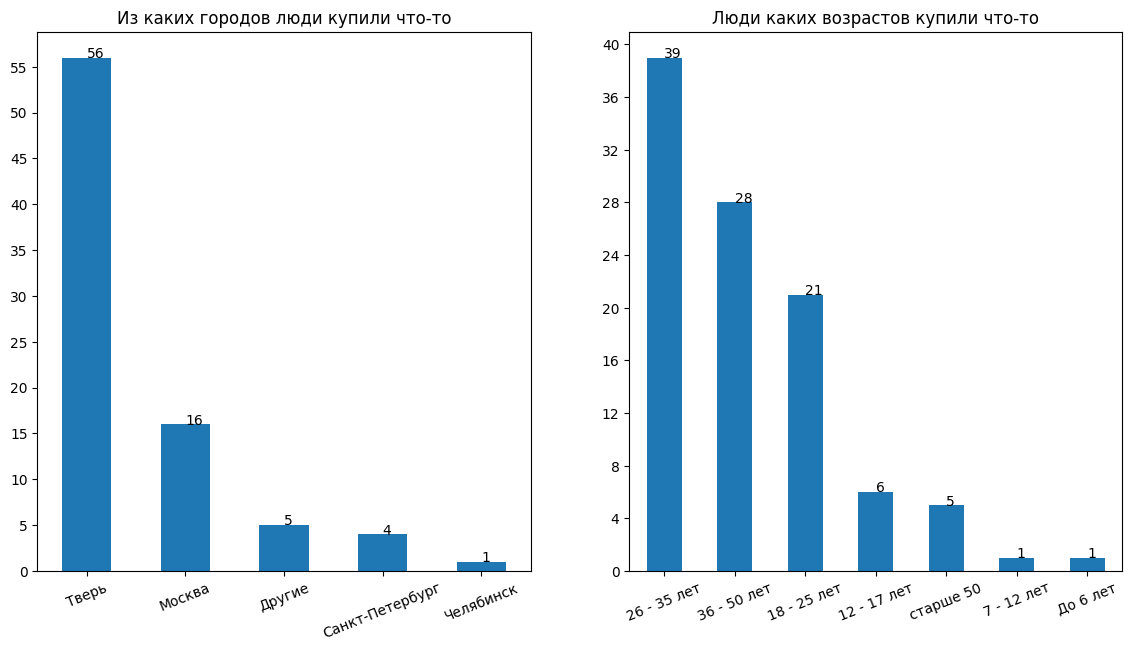

In [575]:
boughtSomething = df.query('Purchases != "Nothing"')[['City', 'Age', 'Purchases']]


boughtSomethingCities = boughtSomething.City.value_counts()

boughtSomethingCities['Другие'] = boughtSomethingCities.sum() - sum(boughtSomethingCities[:5])
boughtSomethingCities = boughtSomethingCities.sort_values(ascending=False)[:5]


boughtSomethingAges = boughtSomething.value_counts('Age')


plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title('Из каких городов люди купили что-то')
boughtSomethingCities.plot(kind='bar')
plt.xticks(rotation=22)
plt.xlabel("")
plt.yticks(range(max(boughtSomethingCities) - 1, -1, -5))
cities = boughtSomethingCities.axes[0].to_list()
for i in range(len(cities)):
    plt.annotate(boughtSomethingCities.iloc[i], (i, boughtSomethingCities.iloc[i]))

plt.subplot(1, 2, 2)
plt.title('Люди каких возрастов купили что-то')
boughtSomethingAges.plot(kind='bar')
plt.xticks(rotation=22)
plt.xlabel("")
plt.yticks(range(max(boughtSomethingAges) + 1, -1, -4))
ages = boughtSomethingAges.axes[0].to_list()
for i in range(len(ages)):
    plt.annotate(boughtSomethingAges.iloc[i], (i, boughtSomethingAges.iloc[i]))

plt.show()